## Question 1 
#### Use Tensorflow to create model

Use Tensorflow to create a model to predict the species of Iris from a flower’s sepal width, sepal length, petal width, and petal length.

In [41]:
# Importing the IRIS data set
import numpy as np
import pandas as pd

df = pd.read_csv('irisdataset.csv', delimiter=",")
# Printing out the data set
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


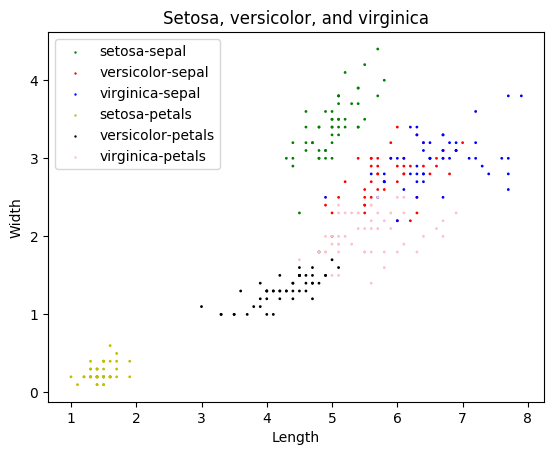

In [42]:
# Adapted from previous problem sheet: https://github.com/DonalMcGahon/Problem-set-Jupyter-pyplot-and-numpy/blob/master/Fisher%E2%80%99s%20iris%20data%20set.ipynb

# The following is a scatter plot of the Iris-DataSet that wew are using in this Problem Sheet

# Title of Scatter Plot
plt.title('Setosa, versicolor, and virginica')

# Scatter plot of all sepal length and width of each species
setosa = plt.scatter(df['sepal_length'], df['sepal_width'], df['species'] == 'setosa', color='g', label='setosa-sepal')
versicolor = plt.scatter(df['sepal_length'], df['sepal_width'], df['species'] == 'versicolor', color='r', label='versicolor-sepal')
virginica = plt.scatter(df['sepal_length'], df['sepal_width'], df['species'] == 'virginica', color='b', label='virginica-sepal')

# Scatter plot of all petal length and width of each species
setosa1 = plt.scatter(df['petal_length'], df['petal_width'], df['species'] == 'setosa', color='y', label='setosa-petals')
versicolor1 = plt.scatter(df['petal_length'], df['petal_width'], df['species'] == 'versicolor', color='black', label='versicolor-petals')
virginica1 = plt.scatter(df['petal_length'], df['petal_width'], df['species'] == 'virginica', color='pink', label='virginica-petals')

# Labels on plot
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
# Displaying scatter plot
plt.show()

In [43]:
# The following code was done in class with lecture Ian McLoughlin, code avabilable at - https://emerging-technologies.github.io/
# Adapted from: https://github.com/salmanahmad4u/keras-iris/blob/master/iris_nn.py

import csv
import numpy as np
import keras as kr

# Load the Iris dataset.
# Data from: https://github.com/mwaskom/seaborn-data/blob/master/iris.csv
iris = list(csv.reader(open('irisdataset.csv')))[1:]

# The inputs are four floats: sepal length, sepal width, petal length, petal width.
inputs  = np.array(iris)[:,:4].astype(np.float)

# Outputs are initially individual strings: setosa, versicolor or virginica.
outputs = np.array(iris)[:,4]
# Convert the output strings to ints.
outputs_vals, outputs_ints = np.unique(outputs, return_inverse=True)
# Encode the category integers as binary categorical vairables.
outputs_cats = kr.utils.to_categorical(outputs_ints)

# Split the input and output data sets into training and test subsets.
inds = np.random.permutation(len(inputs))
train_inds, test_inds = np.array_split(inds, 2)
inputs_train, outputs_train = inputs[train_inds], outputs_cats[train_inds]
inputs_test,  outputs_test  = inputs[test_inds],  outputs_cats[test_inds]

# Create a neural network.
model = kr.models.Sequential()

# Add an initial layer with 4 input nodes, and a hidden layer with 16 nodes.
model.add(kr.layers.Dense(16, input_shape=(4,)))
# Apply the sigmoid activation function to that layer.
model.add(kr.layers.Activation("sigmoid"))
# Add another layer, connected to the layer with 16 nodes, containing three output nodes.
model.add(kr.layers.Dense(3))
# Use the softmax activation function there.
model.add(kr.layers.Activation("softmax"))

# Configure the model for training.
# Uses the adam optimizer and categorical cross entropy as the loss function.
# Add in some extra metrics - accuracy being the only one.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Fit the model using our training data.
model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, verbose=1)

# Evaluate the model using the test data set.
loss, accuracy = model.evaluate(inputs_test, outputs_test, verbose=1)

# Output the accuracy of the model.
print("\n\nLoss: %6.4f\tAccuracy: %6.4f" % (loss, accuracy))

# Predict the class of a single flower.
prediction = np.around(model.predict(np.expand_dims(inputs_test[0], axis=0))).astype(np.int)[0]
print("Actual: %s\tEstimated: %s" % (outputs_test[0].astype(np.int), prediction))
print("That means it's a %s" % outputs_vals[prediction.astype(np.bool)][0])

# Save the model to a file for later use.
model.save("iris_nn.h5")
# Load the model again with: model = load_model("iris_nn.h5")

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 1.0970 - acc: 0.3467
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0302 - acc: 0.4800
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9878 - acc: 0.7467
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.9447 - acc: 0.7467
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9018 - acc: 0.7467
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8558 - acc: 0.7467
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 0.8145 - acc: 0.7467
Epoch 8/100
75/75 [==============================] - 0s 2ms/step - loss: 0.7775 - acc: 0.7467
Epoch 9/100
75/75 [==============================] - 0s 2ms/step - loss: 0.7421 - acc: 0.7467
Epoch 10/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7090 - acc: 0.7467
Epoch 11/100
75/75 [==============================] - 0s 2m

75/75 [==============================] - 0s 1ms/step - loss: 0.1414 - acc: 0.9600
Epoch 88/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1377 - acc: 0.9867
Epoch 89/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1362 - acc: 0.9733
Epoch 90/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1353 - acc: 0.9733
Epoch 91/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1343 - acc: 0.9600
Epoch 92/100
75/75 [==============================] - 0s 2ms/step - loss: 0.1306 - acc: 0.9733
Epoch 93/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1284 - acc: 0.9600
Epoch 94/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1256 - acc: 0.9867
Epoch 95/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1255 - acc: 0.9733
Epoch 96/100
75/75 [==============================] - 0s 1ms/step - loss: 0.1249 - acc: 0.9733
Epoch 97/100
75/75 [==============================] - 0s 1ms/st

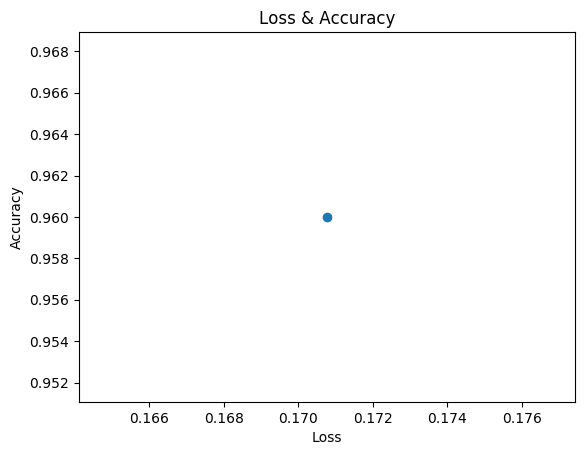

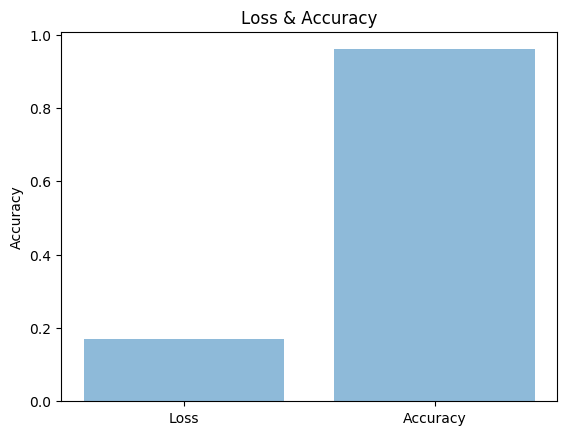

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot to show Loss and Accuracy
plt.title('Loss & Accuracy')
plt.scatter(loss, accuracy)
plt.xlabel("Loss")
plt.ylabel("Accuracy")
# Displaying the Scatter plot
plt.show()

# Adapted from: https://pythonspot.com/en/matplotlib-bar-chart/

# Bar chart to display the Loss and Accuracy of the IRIS dataset
y_pos = np.arange(len(objects))
performance = [loss,accuracy]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Loss & Accuracy')

# Displaying the bar chart
plt.show()